In [1]:
import pandas as pd

df = pd.read_excel(r'D:\Downloads\DSTC vòng 3\finance data\VNINDEX_Finance.xlsx')
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      366 non-null    object 
 1   year        366 non-null    int64  
 2   ratios      366 non-null    object 
 3   EBITMargin  366 non-null    float64
 4   ROA         366 non-null    float64
 5   ROE         366 non-null    float64
 6   ROIC        366 non-null    float64
 7   EPS         366 non-null    float64
 8   PE          366 non-null    float64
 9   PB          366 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 28.7+ KB


In [2]:
df_vnx = pd.read_excel(r'D:\Downloads\DSTC vòng 3\cleaned data\VNINDEX_cleaned.xlsx')
df_vnx["ticker"].nunique()

258

In [3]:
avail_ticker = df.loc[df['ticker'].isin(df_vnx['ticker']), 'ticker'].unique().tolist()
print(len(avail_ticker))

230


In [4]:
df = df[df["ticker"].isin(avail_ticker)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 5 to 365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      230 non-null    object 
 1   year        230 non-null    int64  
 2   ratios      230 non-null    object 
 3   EBITMargin  230 non-null    float64
 4   ROA         230 non-null    float64
 5   ROE         230 non-null    float64
 6   ROIC        230 non-null    float64
 7   EPS         230 non-null    float64
 8   PE          230 non-null    float64
 9   PB          230 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.8+ KB


In [5]:
df["EBITMargin"].describe()

count    230.000000
mean      -0.329634
std        5.518887
min      -81.488870
25%        0.026060
50%        0.087422
75%        0.239771
max        0.711394
Name: EBITMargin, dtype: float64

In [6]:
df["EBITMargin"] = df["EBITMargin"].clip(-1,1)
df["EBITMargin"].describe()

count    230.000000
mean       0.116795
std        0.251847
min       -1.000000
25%        0.026060
50%        0.087422
75%        0.239771
max        0.711394
Name: EBITMargin, dtype: float64

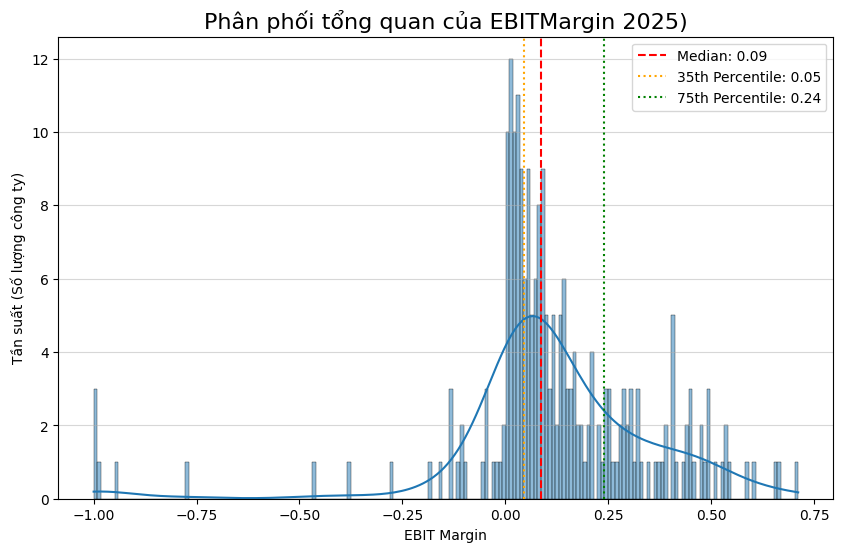

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['EBITMargin'], kde=True, bins=200)
plt.title('Phân phối tổng quan của EBITMargin 2025)', fontsize=16)
plt.xlabel('EBIT Margin')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['EBITMargin'].median(), color='red', linestyle='--', label=f"Median: {df['EBITMargin'].median():.2f}")
plt.axvline(df['EBITMargin'].quantile(0.35), color='orange', linestyle=':', label=f"35th Percentile: {df['EBITMargin'].quantile(0.35):.2f}")
plt.axvline(df['EBITMargin'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['EBITMargin'].quantile(0.75):.2f}")
plt.legend()
plt.show()

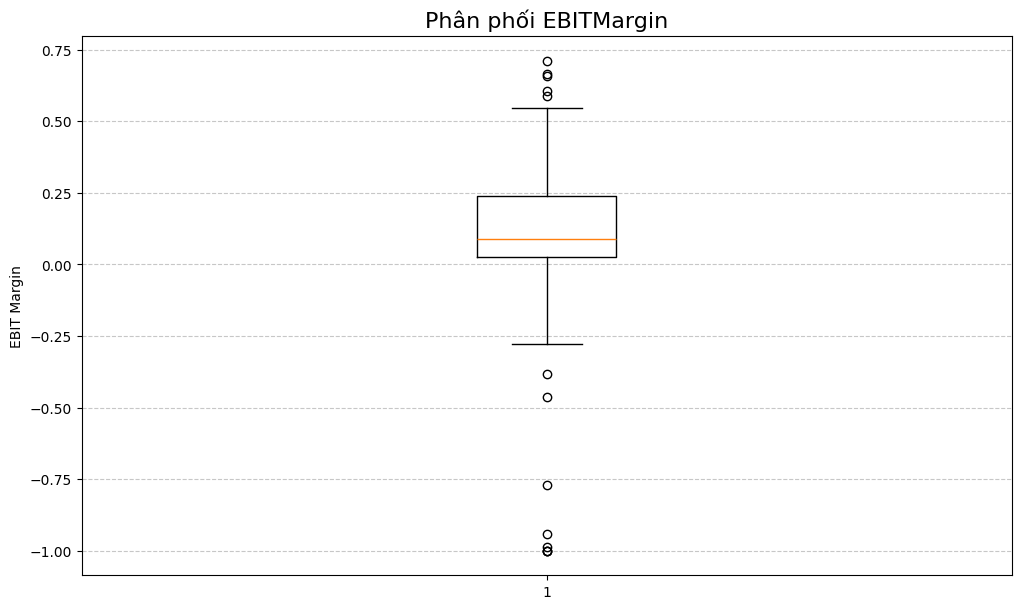

In [8]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["EBITMargin"])
plt.title('Phân phối EBITMargin', fontsize=16)
plt.ylabel('EBIT Margin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
df["ROA"].describe()

count    230.000000
mean       0.046010
std        0.077865
min       -0.332039
25%        0.009618
50%        0.032485
75%        0.065556
max        0.409248
Name: ROA, dtype: float64

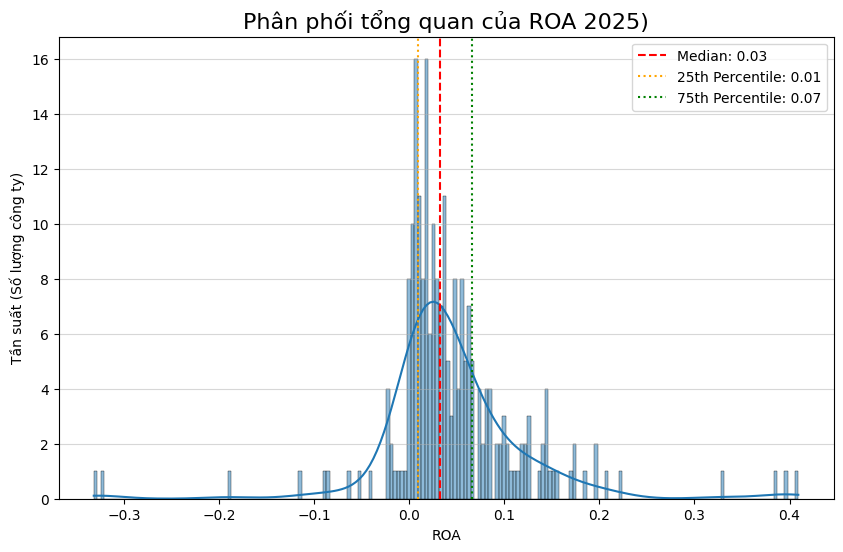

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['ROA'], kde=True, bins=200)
plt.title('Phân phối tổng quan của ROA 2025)', fontsize=16)
plt.xlabel('ROA')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['ROA'].median(), color='red', linestyle='--', label=f"Median: {df['ROA'].median():.2f}")
plt.axvline(df['ROA'].quantile(0.25), color='orange', linestyle=':', label=f"25th Percentile: {df['ROA'].quantile(0.25):.2f}")
plt.axvline(df['ROA'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['ROA'].quantile(0.75):.2f}")
plt.legend()
plt.show()

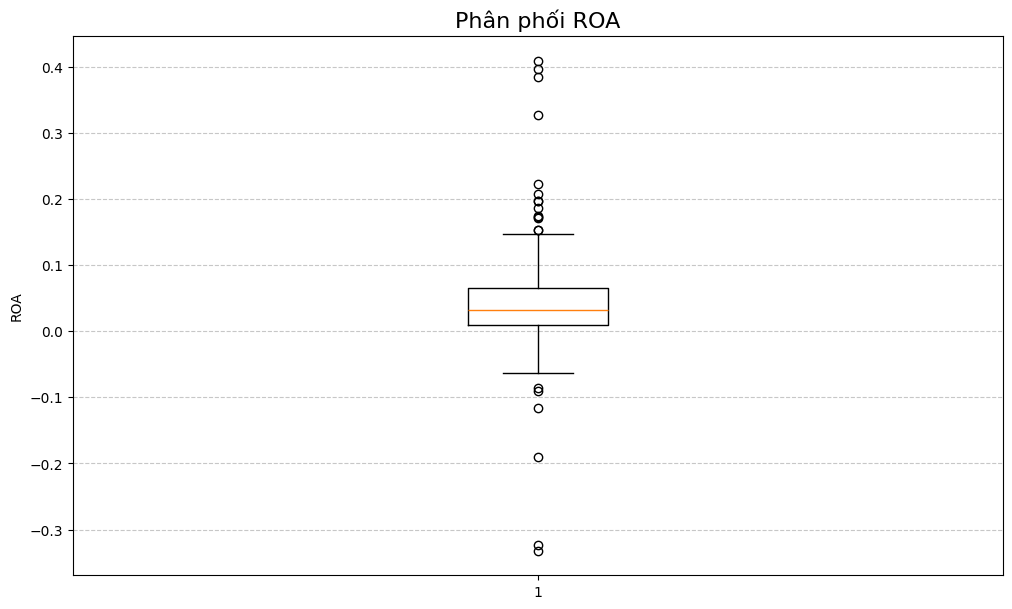

In [11]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["ROA"])
plt.title('Phân phối ROA', fontsize=16)
plt.ylabel('ROA')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
df["ROE"].describe()

count    230.000000
mean       0.075853
std        0.191268
min       -1.663144
25%        0.026287
50%        0.076725
75%        0.141135
max        0.630366
Name: ROE, dtype: float64

In [13]:
df["ROE"] = df["ROE"].clip(-1,1)
df["ROE"].describe()

count    230.000000
mean       0.079068
std        0.166370
min       -1.000000
25%        0.026287
50%        0.076725
75%        0.141135
max        0.630366
Name: ROE, dtype: float64

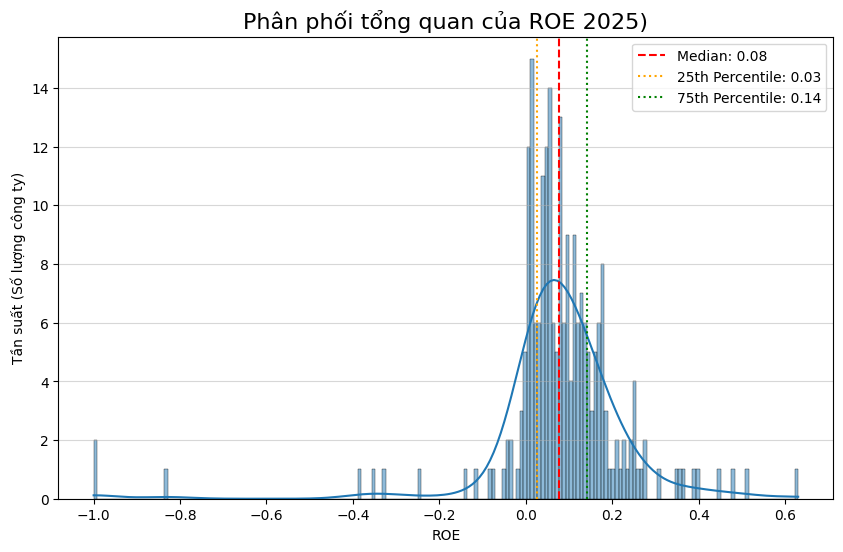

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['ROE'], kde=True, bins=200)
plt.title('Phân phối tổng quan của ROE 2025)', fontsize=16)
plt.xlabel('ROE')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['ROE'].median(), color='red', linestyle='--', label=f"Median: {df['ROE'].median():.2f}")
plt.axvline(df['ROE'].quantile(0.25), color='orange', linestyle=':', label=f"25th Percentile: {df['ROE'].quantile(0.25):.2f}")
plt.axvline(df['ROE'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['ROE'].quantile(0.75):.2f}")
plt.legend()
plt.show()

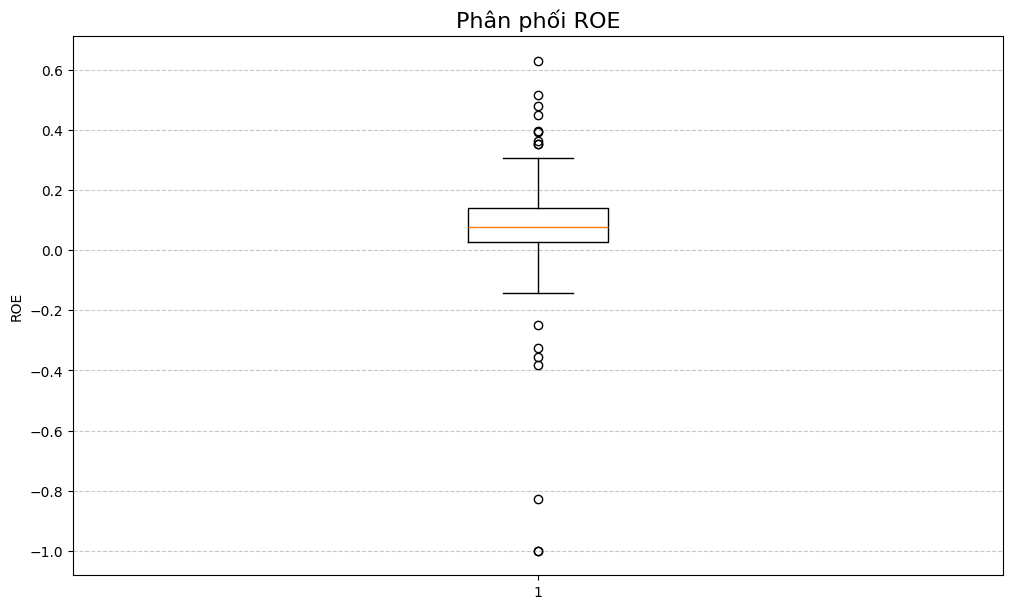

In [15]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["ROE"])
plt.title('Phân phối ROE', fontsize=16)
plt.ylabel('ROE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
df["ROIC"].describe()

count    230.000000
mean       0.062354
std        0.241709
min       -2.984609
25%        0.019937
50%        0.056123
75%        0.098130
max        1.326246
Name: ROIC, dtype: float64

In [17]:
df = df[(df["ROIC"] >= -1) & (df["ROIC"] < 1)]
df["ROIC"].describe()

count    228.000000
mean       0.070175
std        0.104598
min       -0.429144
25%        0.019991
50%        0.056123
75%        0.098022
max        0.581976
Name: ROIC, dtype: float64

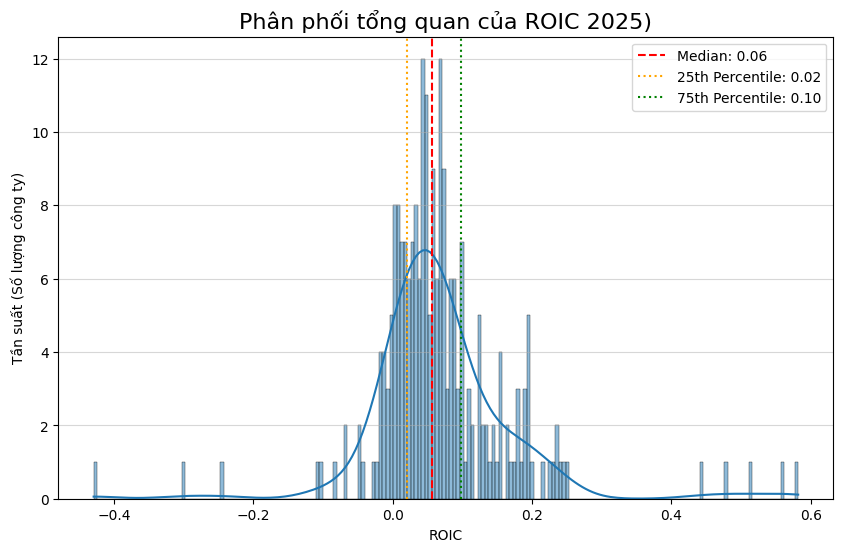

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['ROIC'], kde=True, bins=200)
plt.title('Phân phối tổng quan của ROIC 2025)', fontsize=16)
plt.xlabel('ROIC')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['ROIC'].median(), color='red', linestyle='--', label=f"Median: {df['ROIC'].median():.2f}")
plt.axvline(df['ROIC'].quantile(0.25), color='orange', linestyle=':', label=f"25th Percentile: {df['ROIC'].quantile(0.25):.2f}")
plt.axvline(df['ROIC'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['ROIC'].quantile(0.75):.2f}")
plt.legend()
plt.show()

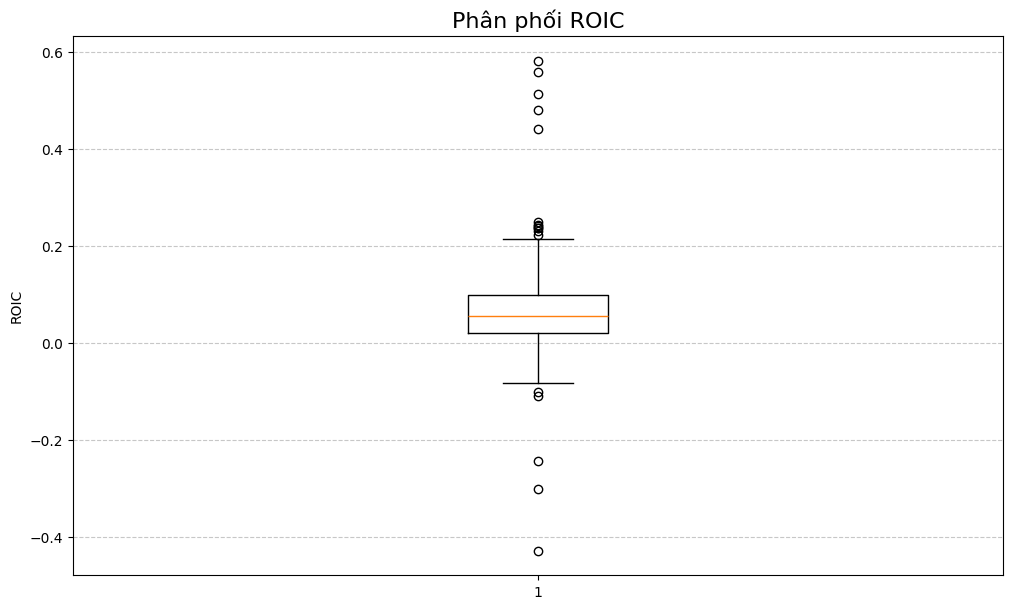

In [19]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["ROIC"])
plt.title('Phân phối ROIC', fontsize=16)
plt.ylabel('ROIC')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
df["PE"].describe()

count     228.000000
mean       27.191476
std       283.699653
min     -1747.815096
25%         9.067469
50%        15.870406
75%        26.452371
max      3433.492558
Name: PE, dtype: float64

In [21]:
df = df[(df["PE"] <= 250) & (df["PE"] >0)]
df["PE"].describe()

count    203.000000
mean      27.802992
std       33.000480
min        1.719035
25%       10.624299
50%       17.142476
75%       27.481258
max      193.588533
Name: PE, dtype: float64

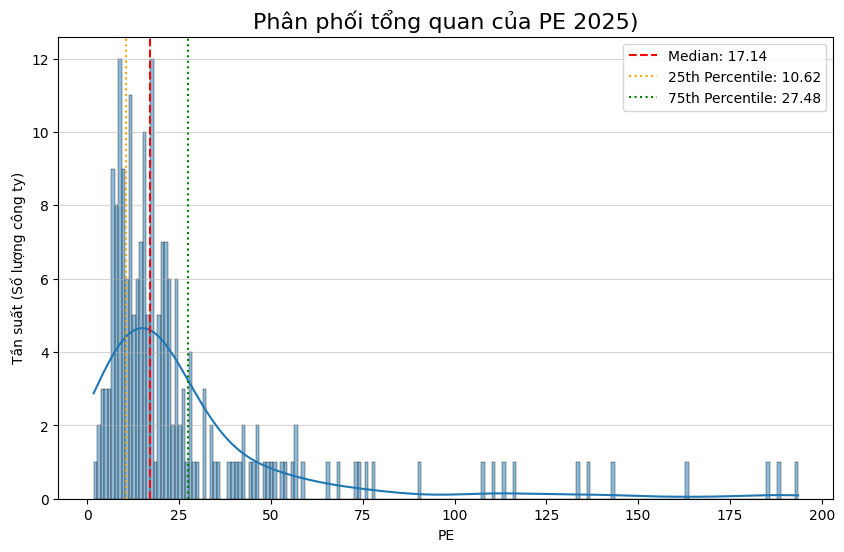

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df["PE"], kde=True, bins=200)
plt.title('Phân phối tổng quan của PE 2025)', fontsize=16)
plt.xlabel('PE')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df["PE"].median(), color='red', linestyle='--', label=f"Median: {df["PE"].median():.2f}")
plt.axvline(df["PE"].quantile(0.25), color='orange', linestyle=':', label=f"25th Percentile: {df["PE"].quantile(0.25):.2f}")
plt.axvline(df["PE"].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df["PE"].quantile(0.75):.2f}")
plt.legend()
plt.show()

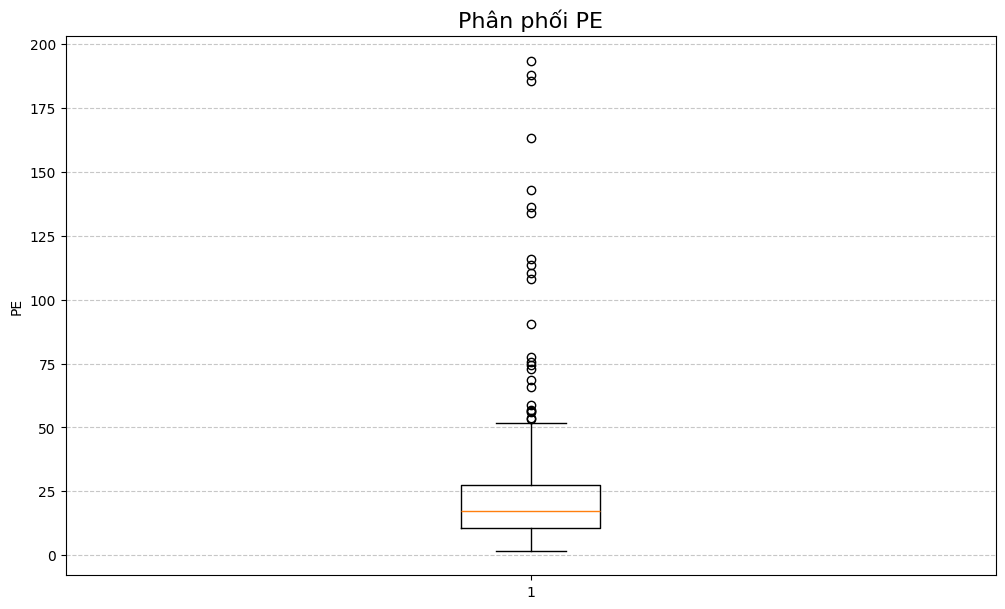

In [23]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["PE"])
plt.title('Phân phối PE', fontsize=16)
plt.ylabel('PE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
df["PB"].describe()

count    203.000000
mean       1.680777
std        1.180736
min        0.269755
25%        0.866041
50%        1.407886
75%        2.095851
max        7.782915
Name: PB, dtype: float64

In [25]:
df = df[(df["PB"] >0) & (df["PB"] <= 6)]
df["PB"].describe()

count    200.000000
mean       1.598857
std        0.977027
min        0.269755
25%        0.864577
50%        1.363180
75%        2.054244
max        5.541431
Name: PB, dtype: float64

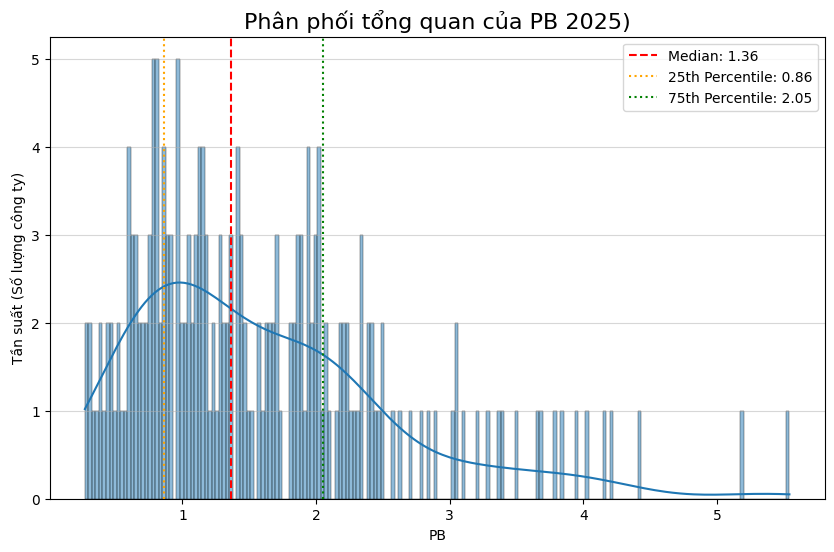

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df["PB"], kde=True, bins=200)
plt.title('Phân phối tổng quan của PB 2025)', fontsize=16)
plt.xlabel('PB')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df["PB"].median(), color='red', linestyle='--', label=f"Median: {df["PB"].median():.2f}")
plt.axvline(df["PB"].quantile(0.25), color='orange', linestyle=':', label=f"25th Percentile: {df["PB"].quantile(0.25):.2f}")
plt.axvline(df["PB"].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df["PB"].quantile(0.75):.2f}")
plt.legend()
plt.show()

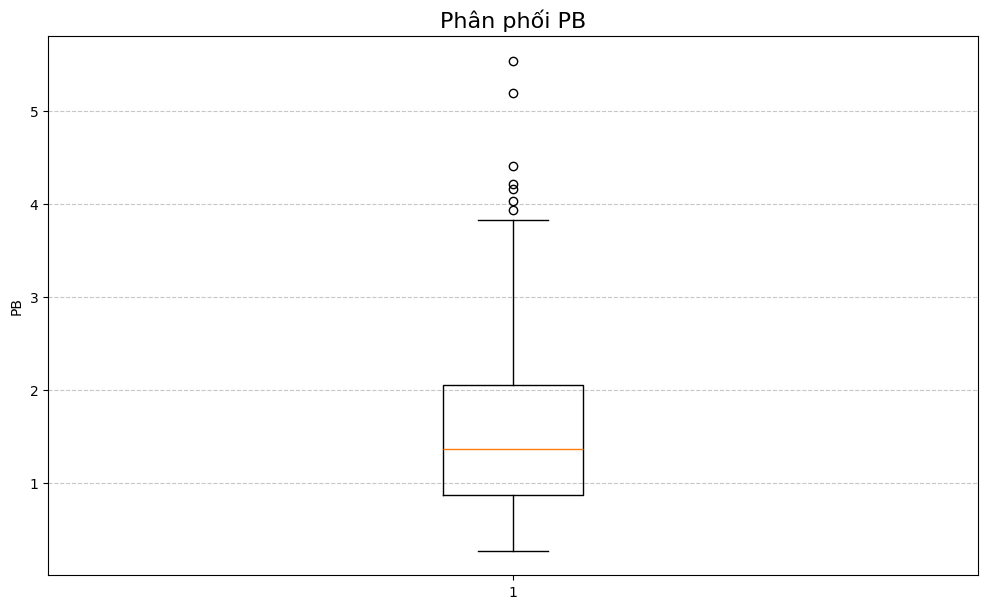

In [27]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["PB"])
plt.title('Phân phối PB', fontsize=16)
plt.ylabel('PB')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
df["ticker"].nunique()

200

In [29]:
ticker_verified = []
i = 0
for ticker in df["ticker"].unique():
    row = df[df["ticker"] == ticker].iloc[0]  
    i+=1
    if (
        row["EBITMargin"] >= 0.05
        and row["ROA"] >= df["ROA"].quantile(0.25)
        and row["ROE"] >= df["ROE"].quantile(0.25)
        and row["ROIC"] >= 0.03
    ):
        ticker_verified.append(ticker)

print(len(ticker_verified))

113
